# 뉴스 요약본 만들기
## 개요

## 목차
1. 데이터 준비하기
- NLTK(라이브러리)와 NLTK 불용어 사전 다운로드
- 데이터 전처리를 위한 패키지 다운로드
- 데이터 샘플을 불러와 확인하기
- 데이터프레임에서 훈련에 사용할 Text, Summary 열만 남기기 

2. 데이터 전처리하기 - (1) 데이터 정리하기
- 중복 샘플 제거하기 - 데이터프레임의 drop_duplicates()를 사용
- 데이터프레임에 Null 값이 있는지 확인 및 제거 - .isnull().sum()함수와 dropna()함수 사용
- 텍스트 정규화
- 불용어 처리

3. 데이터 전처리하기 - (2) 훈련데이터와 테스트데이터 나누기
4. 데이터 전처리하기 - (3) 정수 인코딩
5. 모델 설계하기
6. 모델 훈련하기
7. 인퍼런스 모델 구현하기
8. 모델 테스트하기
9. 추출적 요약 해보기

## 회고

## Reference
---

## 1. 데이터 준비하기
NLTK의 불용어(stopwords)를 사용합니다.  
- NLTK는 Natural Language Toolkit의 축약어로 영어 기호, 통계, 자연어 처리를 위한 라이브러리입니다.  
- 이 NLTK에는 I, my, me, over, 조사, 접미사와 같이 문장에는 자주 등장하지만,   
의미를 분석하고 요약하는 데는 거의 의미가 없는 100여개의 불용어가 미리 정리되어 있습니다.
- 이를 이용해 다운로드한 리뷰 파일에서 불용어를 제거하는 작업을 진행합니다.  

In [2]:
# NLTK 설치
!pip install nltk

경고 메세지  
일반적으로 사용자가 시스템 루트 권한으로 pip를 실행했을 때 나타납니다.   
시스템 루트 권한으로 pip를 실행하면 시스템 전체에 대한 패키지 설치가 이루어지며,   
이는 시스템 라이브러리와 충돌하거나 권한 문제를 일으킬 수 있다는 경고 메세지입니다.  
터미널에서 가상 환경을 사용하여 패키지를 설치하겠습니다.

In [5]:
# # 가상환경 생성
# python -m venv myenv

# # 가상환경 활성화
# source myenv/bin/activate

# # 가상환경에서 패키지 설치
# pip install nltk

NLTK 패키지에서 불용어 사전을 다운로드하고, 데이터 전처리를 위한 나머지 패키지도 함께 불러와 보겠습니다.

In [6]:
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os
import re   # 정규 표현식을 사용하기 위한 re (Regular Expression) 모듈
import matplotlib.pyplot as plt
from nltk.corpus import stopwords   # nltk에서 제공하는 불용어 데이터를 사용하기 위해 stopwords를 가져오기
from bs4 import BeautifulSoup       # HTML 또는 XML과 같은 마크업 언어에서 데이터를 추출하기 위한 BeautifulSoup 라이브러리를 가져오기
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

print('=3')


# from tensorflow.keras.preprocessing.text import Tokenizer: 텍스트를 토큰화하기 위한 Keras의 Tokenizer를 가져옵니다.
# from tensorflow.keras.preprocessing.sequence import pad_sequences: 
# 시퀀스 데이터를 패딩하기 위한 Keras의 pad_sequences를 가져옵니다.
# import urllib.request: 웹에서 데이터를 다운로드하기 위한 urllib 라이브러리를 가져옵니다.
# import warnings: 경고 메시지를 처리하기 위한 warnings 모듈을 가져옵니다.
# warnings.filterwarnings("ignore", category=UserWarning, module='bs4'): 
# BeautifulSoup 모듈에서 발생하는 UserWarning을 무시하도록 경고 메시지를 필터링합니다.

=3


[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


링크에서 다운로드 받은 데이터(Reviews.csv)는 총 568,454개의 샘플을 갖고 있습니다.  
시간 상 여기서는 모든 샘플을 사용하지는 않고, 간단히 10만 개의 샘플만 사용해보겠습니다.

In [7]:
data = pd.read_csv(os.getenv("HOME")+"/aiffel/news_summarization/data/Reviews.csv", nrows=100000)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 100000


출력된 샘플 수를 보면 총 10만 개의 샘플이 잘 불러와진 것을 확인할 수 있습니다. 

In [8]:
# 샘플 5개만 출력해보기
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


전체 데이터 중 Summary 열과 Text 열만 훈련에 사용할 거라, 이 두 개의 열만 별도로 저장하고, 다시 출력해보겠습니다.

In [9]:
# Q. 데이터프레임 data의 Text와 Summary 컬럼의 데이터만 남기는 코드를 작성하세요.

df = data.copy()

selected_columns = ['Text', 'Summary']
data = data[selected_columns]
data.head()

#랜덤한 15개 샘플 출력
data.sample(15)

,Text,Summary
70339,There's only one thing keeping me from giving ...,"Not bad, has a bit of a weird aftertaste, though"
26428,The product is not fresh when they send it bec...,not sealed
16443,I have enjoyed this brand of coffee for severa...,awesome coffee
55588,I enjoy cereal and this cereal is like most su...,"TASTY, BUT NOTHING NEW!"
87907,This product is very helpful in training my do...,Handy and WORKS!
42879,When the bar of NEWMAN'S OWN ORGANICS DARK CHO...,Don't Be Afraid Of The Dark
24805,My dog doesn't like big bones. She barely chew...,USA & Size Matters
75248,"I have 2 small dogs, that absolutely love gree...",amazing value price.
62239,"The strong, spicy aroma (clove and cinnamon do...",Powerful stuff
13038,I first ate these in Ireland. This pub I went ...,MY ABSOLUTE FAVORITE COOKIE


Text 열의 내용을 요약한 것이 Summary 열입니다.  
여기서는 인공 신경망을 통해 Text 시퀀스를 입력받으면, Summary 시퀀스를 예측하도록 인공 신경망을 훈련시켜보겠습니다.

## 2. 데이터 전처리하기 - (1) 데이터 정리하기
빈칸으로 존재하는 null 데이터, 의미는 같지만 다른 식으로 작성된 글 같은 중복 항목과 같은 학습할 때 방해가 되는 데이터를 먼저 솎아내겠습니다.  

### 중복 샘플과 NULL 값이 존재하는 샘플 제거

In [11]:
# 데이터의 중복 샘플 유무를 확인하기

print('Text 열에서 중복을 배제한 유일한 샘플의 수 :', data['Text'].nunique())
print('Summary 열에서 중복을 배제한 유일한 샘플의 수 :', data['Summary'].nunique())

Text 열에서 중복을 배제한 유일한 샘플의 수 : 88426
Summary 열에서 중복을 배제한 유일한 샘플의 수 : 72348


> 해석  
> - 중복을 제외한다면 Text에는 88,426개, Summary에는 72,348개의 유니크한 데이터가 존재
> - 이 데이터의 Summary는 'Smelly'나 'Good Product'와 같이 아주 간단한 요약들도 많아서 Text가 달라도 Summary는 동일할 수 있음.
> - 하지만 Text 자체가 중복이 된 경우는 중복 샘플이므로 제거해야함.

In [12]:
# 중복 샘플 제거하기 - 데이터프레임의 drop_duplicates()를 사용

data.drop_duplicates(subset = ['Text'], inplace=True)
print('전체 샘플수 :', (len(data)))

# subset은 중복을 검사할 때 어떤 컬럼 또는 컬럼의 집합을 기준으로 할지를 지정하는 매개변수
# inplace=True 를 설정하면 DataFrame 타입 값을 return 하지 않고 data 내부를 직접적으로 바꿉니다

전체 샘플수 : 88426


> 중복이 제거되면서 샘플 수가 88,426개로 줄어들었습니다.  
drop_duplicates() 함수는 중복된 Null들을 완전히 삭제하지는 못할 수 있으므로 데이터에 Null 값이 남아있는지 확인해야 합니다.  
(만약 데이터 Null 값을 가지는 샘플이 있었다면,   
drop_duplicates()가 중복된 Null들을 지워주기는 하겠지만, 여전히 Null 값 한 개가 어딘가 남아있을 수 있습니다.)       
데이터에 Null 값이 남아있는지 확인해보겠습니다.

In [13]:
# 데이터프레임에 Null 값이 있는지 확인 - .isnull().sum()을 사용

print(data.isnull().sum())

Text       0
Summary    1
dtype: int64


Summary에 1개의 Null 값이 있습니다. Null을 제거하겠습니다.

In [15]:
# 데이터프레임에서 Null을 제거하기 - dropna() 함수를 사용하면 돼요.

data.dropna(axis=0, inplace=True)   # axis=0는 행(row)을 기준으로 NaN 값이 있는 행을 제거하도록 지정
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 88425


> 전체 샘플 수가 1개 줄어들어 88,425개의 샘플이 남았습니다.  
지금까지 중복 샘플과 Null 값이 있는 샘플들을 제거해보았는데 10만 개의 샘플 중 1만 개 이상의 샘플이 제거되었습니다.

## 텍스트 정규화와 불용어 제거
### 텍스트 정규화 : 동의어를 1개의 표현으로 통일시켜주어 기계의 연산량을 줄이기

살아남은 88,425개의 샘플에는 수많은 단어들이 있습니다.  
그런데 사실 그 단어들 중에서는 같은 의미인데도 다른 표현으로 쓰여 마치 다른 단어들처럼 간주되는 경우가 있습니다.  

예를 들어서 it'll은 it will과 같고, mustn't과 must not은 사실 같은 표현입니다.  
이런 경우 기계가 굳이 이들을 마치 다른 단어로 간주하게 해서 연산량을 늘리는 것보다는   
기계 학습 전에 미리 같은 표현으로 통일시켜주는 것이 기계의 연산량을 줄일 수 있는 방법입니다.  

이러한 방법론을 텍스트 처리에서는 **텍스트 정규화(text normalization)** 라고 합니다.   

여기서는 텍스트 정규화를 위한 사전(dictionary)을 아래와 같이 구성합니다.  
이 사전은 아래의 링크에서 참고하여 만들었습니다.  
[정규화 사전 출처](https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python)

In [17]:
# 텍스트 정규화를 위한 사전 구성

contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


### 불용어 처리

**일반적으로 텍스트에는 자주 등장하지만 자연어 처리를 할 때 실질적으로 별 도움이 되지 않는 단어들이 존재**합니다.  
이를 **불용어(stopwords)**라고 부릅니다. 때로는 불용어를 제거하는 것이 자연어 처리의 성능을 높이는 방법일 수 있습니다.  
여기서는 NLTK에서 제공하는 불용어 리스트를 참조해, 샘플에서 불용어를 제거해보겠습니다.

In [18]:
# 불용어 개수와 불용어 확인하기

print('불용어 개수 :', len(stopwords.words('english') ))
print(stopwords.words('english'))

불용어 개수 : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

NLTK에서 미리 정의하여 제공하고 있는 불용어는 총 179개라는 것을 볼 수 있습니다. 이를 사용하여 불용어를 제거하겠습니다.   

**최종적인 불용어 제거 작업**은 아래와 같습니다.  
- NLTK에서 미리 정의하여 제공하고 있는 불용어 제거
- 모든 영어 문자는 소문자로 만들기
- 섞여있는 html 태그를 제거
- 정규 표현식을 통해 각종 특수문자를 제거  

위의 작업으로 정말 필요한 내용만 잘 학습할 수 있도록 처리하겠습니다.

**NLTK를 이용해 불용어를 제거하는 파트**  
- Text 전처리 시에서만 호출하고 이미 상대적으로 문장 길이가 짧은 Summary 전처리할 때는 호출하지 않을 것
- Abstractive한 문장 요약 결과문이 자연스러운 문장이 되려면 이 불용어들이 Summary에는 남아 있는 게 더 좋음
- 이 처리를 위해서 함수의 인자로 remove_stopwords를 추가하고, if문을 추가

In [19]:
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens
print('=3')

# sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) 
# 텍스트 내의 약어를 정규화하는 과정을 수행
# contractions는 축약형을 키(key)로 가지고, 해당 축약형을 전체 단어로 대체할 값을 값(value)으로 가지는 딕셔너리
# 예를 들어, "I'm"은 "I am"으로 변환되고, "won't"은 "will not"으로 변환

=3


In [20]:
# 임의의 text와 summary를 만들어 함수를 호출해보기 (함수가 잘 만들어졌는지 확인)

temp_text = 'Everything I bought was great, infact I ordered twice and the third ordered was<br />for my mother and father.'
temp_summary = 'Great way to start (or finish) the day!!!'

print("text: ", preprocess_sentence(temp_text))
print("summary:", preprocess_sentence(temp_summary, False))  # 불용어를 제거하지 않습니다.

text:  everything bought great infact ordered twice third ordered wasfor mother father
summary: great way to start the day


> 결과 해석   
> - 기본적으로 모든 알파벳이 소문자로 변환되고, <br />과 같은 html 태그가 제거되었습니다.
> - (or finish)와 같은 괄호로 묶였던 단어 시퀀스가 제거되었으며, 특수문자가 제거되면서 영어만 남았습니다.  

이제 함수가 잘 작동하는 것을 확인했으니, 훈련 데이터 전체에 대해서 전처리를 수행합니다.  
이때, **Text의 경우에는 불용어를 제거하고, Summary의 경우에는 불용어를 제거하지 않을 것이므로 따로 호출해서 진행**해야 합니다.  
먼저 Text를 전처리하고, 결과를 확인하기 위해서 상위 5개의 줄을 출력해보겠습니다.

In [25]:
# 전체 Text 데이터에 대한 전처리 : 10분 이상 시간이 걸릴 수 있습니다.
clean_text = []

# 판다스 데이터프레임의 행(row)을 순회하는 함수 iterrows()를 활용
for i, row in data.iterrows():
    # "Text" 컬럼에 대한 전처리
    preprocessed_text = preprocess_sentence(row['Text'], remove_stopwords=True)
    
    # 결과를 clean_text 리스트에 추가
    clean_text.append(preprocessed_text)

# 전처리 후 출력
print("Text 전처리 후 결과: ", clean_text[:5])

Text 전처리 후 결과:  ['bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better', 'product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo', 'confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch', 'looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal', 'great taffy great price wide assortment yummy taffy delivery quick taffy lover deal']


이제 Summary에 대해서 전처리 함수를 호출해 줄 때는, 불용어 제거를 수행하지 않는다는 의미에서 두 번째 인자로 False를 넣어주겠습니다.

In [26]:
# 전체 Summary 데이터에 대한 전처리 
clean_summary = []

# 판다스 데이터프레임의 행(row)을 순회하는 함수 iterrows()를 활용
for i, row in data.iterrows():
    # "Summary" 컬럼에 대한 전처리
    preprocessed_summary = preprocess_sentence(row['Summary'], remove_stopwords=False)

    # 결과를 clean_summary 리스트에 추가
    clean_summary.append(preprocessed_summary)

print("Summary 전처리 후 결과: ", clean_summary[:5])

Summary 전처리 후 결과:  ['good quality dog food', 'not as advertised', 'delight says it all', 'cough medicine', 'great taffy']


**텍스트 정제 과정을 거친 후에는 빈(empty) 샘플이 생겼는지 다시 한 번 확인해보기!!**  

> Why?  정제 과정에서 문장의 모든 단어가 사라지는 경우(=샘플 자체가 빈 값이 되는 경우)가 생겼는지 확인하기 위해!    
>
> 정제 전에는 데이터가 존재했지만, 정제 과정에서 문장의 모든 단어가 사라지는 경우가 있을 수 있습니다.  
> 이렇게 되면 샘플 자체가 빈 값을 가지게 되므로

**데이터들을 데이터프레임에 재저장하기**
- 보다 쉽게 확인하기 위해  
- 빈(empty) 값을 가진 샘플들이 있다면, 모두 Null 값을 가진 샘플로 대체합니다.

In [27]:
data['Text'] = clean_text
data['Summary'] = clean_summary

# 빈 값을 Null 값으로 변환
data.replace('', np.nan, inplace=True)
print('=3')

=3


In [28]:
# Null 값이 생겼는지 확인 - .isnull().sum()을 사용하여
data.isnull().sum()

Text        0
Summary    70
dtype: int64

Summary 열에서 70개의 Null 값이 생겼습니다.  
원래는 단어가 있었는데, 정제 과정에서 모든 단어가 제거되어 빈 샘플이 70개나 생겼다는 의미입니다.   
이 샘플들은 모두 제거해줍니다.

In [29]:
# 정제 과정 후 생긴 빈 샘플을 모두 제거하기 

data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 88355


## 3. 데이터 전처리하기 - (2) 훈련데이터와 테스트데이터 나누기
학습을 진행하기 위해서는 학습에 사용할 데이터의 크기를 결정하고, 문장의 시작과 끝을 표시해 주어야 합니다.  

### 샘플의 최대 길이 정하기
필요 없는 단어를 모두 솎아낸 데이터를 가지게 되었으니, 이제 훈련에 사용할 샘플의 최대 길이를 정해줄 차례입니다.  
Text와 Summary의 최소, 최대, 평균 길이를 구하고 또한 길이 분포를 시각화해서 보겠습니다.

텍스트의 최소 길이 : 2
텍스트의 최대 길이 : 1235
텍스트의 평균 길이 : 38.792428272310566
요약의 최소 길이 : 1
요약의 최대 길이 : 28
요약의 평균 길이 : 4.010729443721352


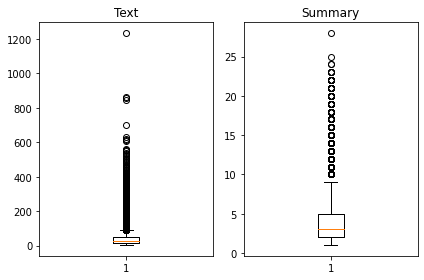

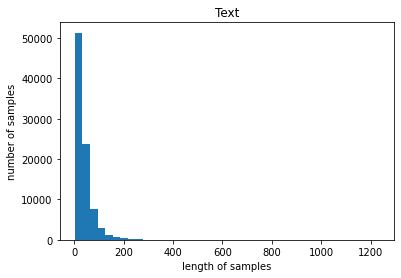

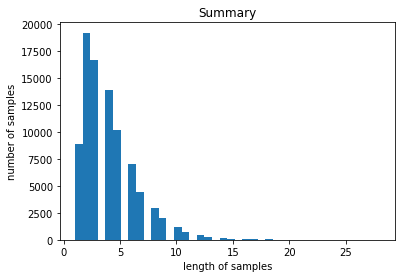

In [31]:
# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['Text']]
summary_len = [len(s.split()) for s in data['Summary']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(summary_len)
plt.title('Summary')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Summary')
plt.hist(summary_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

# bins는 히스토그램에서 데이터를 나누는 구간의 개수를 지정하는 매개변수입니다. 
# 히스토그램은 데이터를 구간으로 나누고 각 구간에 속하는 데이터의 개수를 나타내는 그래프입니다. 

위에서부터 차례대로 그래프는 각각 실제 텍스트와 요약의 길이 분포, 실제 텍스트 샘플 길이별 개수, 요약본 샘플 길이별 개수를 나타냅니다.  

**Text 그래프 분석**  
- boxplot : Text의 경우 최소 길이가 2, 최대 길이가 1,235로 그 차이가 굉장히 크다.
- 히스토그램(hist) : 하지만 평균 길이는 38로 시각화된 그래프로 봤을 때는 대체적으로는 100 내외의 길이를 가진다는 것을 확인할 수 있다.  
    
**Summary 그래프 분석**  
- boxplot : 최소 길이가 1, 최대 길이가 28, 그리고 평균 길이가 4로 Text에 비해 상대적으로 길이가 매우 짧다.
- 히스토그램(hist) : 대체적으로 10이하의 길이를 가지고 있다.

In [32]:
# Text의 최대 길이와 Summary의 적절한 최대 길이를 임의로 지정

text_max_len = 50
summary_max_len = 8
print('=3')

=3


**최대 길이 결정하는 방법**  
- 각각 50과 8로 정했는데 이 길이를 선택했을 때, 얼마나 많은 샘플들을 자르지 않고 포함할 수 있는지 통계로 확인해보기
- 훈련 데이터와 샘플의 길이를 입력하면, 데이터의 몇 %가 해당하는지 계산하는 함수를 만들어서 좀 더 정확하게 판단하기

In [34]:
# 임의 지정한 최대 길이 내에 데이터의 몇 %가 해당하는지 확인하는 함수 만들기

# max_len은 주어진 길이(임의로 지정한 길이)
# nested_list는 훈련 데이터 리스트 (중첩 리스트)
# 중첩 리스트는 리스트 안에 다른 리스트가 포함된 형태를 말한다.

def below_threshold_len(max_len, nested_list):
  cnt = 0   # max_len 이하인 샘플의 개수를 세기 위해 cnt 변수를 초기화
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))
print('=3')

=3


이 함수를 Text와 Summary에 적용해 우리가 결정한 임의의 길이가 몇%의 샘플까지 포함하는지 볼 수 있습니다.

In [35]:
# 전체 샘플 중 임의 지정한 최대 길이 이하인 샘플의 비율 확인하기

below_threshold_len(text_max_len, data['Text'])
below_threshold_len(summary_max_len,  data['Summary'])

전체 샘플 중 길이가 50 이하인 샘플의 비율: 0.7745119121724859
전체 샘플 중 길이가 8 이하인 샘플의 비율: 0.9424593967517402


각각 50과 8로 패딩을 하게 되면 해당 길이보다 긴 샘플들은 내용이 잘리게 되는데, Text 열의 경우에는 약 23%의 샘플들이 내용이 망가지게 됩니다.  
정해진 길이에 맞춰 자르는 것이 아니라, **정해진 길이보다 길면 제외하는 방법**으로 데이터를 정제해보겠습니다.  

Q. Text와 Summary를 담고 있는 data 데이터프레임을 위에서 임의로 정의한 text_max_len과 summary_max_len의 길이보다 큰 샘플을 제외하는 코드를 작성하세요.   
(힌트 : apply 함수와 lamda식을 사용)

In [37]:
data = data[data.apply(lambda row: len(row['Text'].split()) <= text_max_len and len(row['Summary'].split()) <= summary_max_len, axis=1)]

print('전체 샘플수 :', (len(data)))

# axis=1 로 설정하여 각 행에 대하여 함수를 적용하여, 각 행의 값들을 함수에 전달
# data[]에서 대괄호 []는 데이터프레임에서 조건을 만족하는 행들을 선택하기 위한 인덱싱 방법으로,
# 위의 코드는 조건을 만족하는 행들로 이루어진 새로운 데이터프레임을 생성한 것.

전체 샘플수 : 65818


### 시작 토큰과 종료 토큰 추가하기
디코더는 시작 토큰을 입력받아 문장을 생성하기 시작하고, 종료 토큰을 예측한 순간에 문장 생성을 멈춥니다.  

![SOS, EOS](https://d3s0tskafalll9.cloudfront.net/media/original_images/E-21-4.png)  
- 시작 토큰 SOS와 종료 토큰 EOS는 각각 start of a sequence와 end of a sequence를 나타냅니다.
- https://arxiv.org/pdf/1812.02303.pdf  

seq2seq 훈련을 위해서는 디코더의 입력과 레이블에 시작 토큰과 종료 토큰을 추가해야 합니다.  
이번 실습에서는 시작 토큰은 sostoken, 종료 토큰은 eostoken이라 임의로 명명하고 앞, 뒤로 추가합니다.   
다음과 같이 변수를 설정합니다.  
- 디코더의 입력에 해당하면서 시작 토큰이 맨 앞에 있는 문장의 이름을 decoder_input   
- 디코더의 출력 또는 레이블에 해당되면서 종료 토큰이 맨 뒤에 붙는 문장의 이름을 decoder_target
두 개의 문장 모두 Summary 열로부터 만듭니다. 

In [38]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
data['decoder_input'] = data['Summary'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['Summary'].apply(lambda x : x + ' eostoken')
data.head()

,Text,Summary,decoder_input,decoder_target
0,bought several vitality canned dog food produc...,good quality dog food,sostoken good quality dog food,good quality dog food eostoken
1,product arrived labeled jumbo salted peanuts p...,not as advertised,sostoken not as advertised,not as advertised eostoken
2,confection around centuries light pillowy citr...,delight says it all,sostoken delight says it all,delight says it all eostoken
3,looking secret ingredient robitussin believe f...,cough medicine,sostoken cough medicine,cough medicine eostoken
4,great taffy great price wide assortment yummy ...,great taffy,sostoken great taffy,great taffy eostoken


앞뒤로 토큰이 잘 붙었습니다.  
인코더의 입력, 디코더의 입력과 레이블을 각각 다시 Numpy 타입으로 저장합니다.

In [39]:
# 인코더의 입력, 디코더의 입력과 레이블을 각각 Numpy 타입으로 저장

encoder_input = np.array(data['Text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블
print('=3')

=3


### 훈련 데이터와 테스트 데이터를 분리하기

훈련 데이터와 테스트 데이터를 분리하는 방법    
- 분리 패키지를 사용하는 방법
- 직접 코딩을 통해서 분리하는 방법 등 여러 가지 방법이 있음

이번 실습에서는 직접 분리해봅니다.   
우선, encoder_input과 크기와 형태가 같은 순서가 섞인 정수 시퀀스를 만들어줍니다.

In [40]:
# encoder_input과 크기와 형태가 같은 순서가 섞인 정수 시퀀스 만들기

indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[61067 36023  4505 ... 21350 43731 20603]


In [42]:
# 전체 샘플 수 shape으로 확인하기

encoder_input.shape

(65818,)

In [43]:
indices.shape

(65818,)

이 정수 시퀀스를 이용해 다시 데이터의 샘플 순서를 정의해 주면 잘 섞인 샘플이 됩니다.

In [45]:
# 정수 시퀀스의 배열을 이용하여 잘 섞인 샘플(encoder_input, decoder_input, decoder_target) 만들기

encoder_input = encoder_input[indices]   # encoder_input 배열의 행을 indices에 주어진 순서대로 재배열
decoder_input = decoder_input[indices]   # decoder_input 배열의 행을 indices에 주어진 순서대로 재배열
decoder_target = decoder_target[indices] # decoder_target 배열의 행을 indices에 주어진 순서대로 재배열
print('=3')

=3


이제 섞인 데이터를 8:2의 비율로 훈련 데이터와 테스트 데이터로 분리합니다.   
전체 데이터의 크기에서 0.2를 곱해서 테스트 데이터의 크기를 정의해줍니다.

In [46]:
# test data 크기 정하기 - 전체 데이터의 20%

n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 13163


이렇게 정의한 테스트 데이터의 개수를 이용해 전체 데이터를 양분합니다.    
:표시의 위치에 주의해 주세요.

In [47]:
# 전체 데이터를 각각의 train, test data로 나누기

encoder_input_train = encoder_input[:-n_of_val]   # 전체데이터의 처음부터 테스트데이터(20%) 전까지 = 80%
decoder_input_train = decoder_input[:-n_of_val]   # 디코더입력의 처음부터 테스트데이터(20%) 전까지 = 80%
decoder_target_train = decoder_target[:-n_of_val] # 디코더레이블의 처음부터 테스트데이터(20%) 전까지 = 80%

encoder_input_test = encoder_input[-n_of_val:]    # 전체데이터의 나머지 = 20%
decoder_input_test = decoder_input[-n_of_val:]    # 디코더입력의 나머지 = 20%
decoder_target_test = decoder_target[-n_of_val:]  # 디코더레이블의 나머지 = 20%

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 52655
훈련 레이블의 개수 : 52655
테스트 데이터의 개수 : 13163
테스트 레이블의 개수 : 13163


훈련 데이터와 테스트 데이터가 각각 52,655개와 13,163개로 잘 분리되었습니다!  

- encoder의 input(을 80:20으로 나누기)
    - encoder의 (훈련 데이터) 80% -> 훈련 데이터의 개수
    - encoder의 (훈련 레이블) 20% -> 데스트 데이터의 개수
- decoder의 input(을 80:20으로 나누기)
    - decoder의 (테스트 데이터) 80% -> 훈련 레이블의 개수
    - decoder의 (테스트 레이블) 20% -> 테스트 레이블의 개수

## 4. 데이터 전처리하기 - (3) 정수 인코딩


### 단어 집합(vocabulary) 만들기 및 정수 인코딩
#### 단어 집합 만들기란?
- 훈련 데이터와 테스트 데이터의 각 단어에 고유한 정수를 맵핑하는 작업 (기계가 텍스트를 숫자로 처리할 수 있도록)  

이제 기계가 텍스트를 숫자로 처리할 수 있도록 훈련 데이터와 테스트 데이터의 단어들을 모두 정수로 바꾸어 주어야 합니다.  
이를 위해서는 각 단어에 고유한 정수를 맵핑하는 작업이 필요합니다. 이 과정을 단어 집합(vocabulary) 을 만든다고 표현합니다.   

훈련 데이터에 대해서 단어 집합을 만들어봅니다. 우선, 원문에 해당되는 encoder_input_train에 대해서 단어 집합을 만들겠습니다.   
Keras의 토크나이저를 사용하면, 입력된 훈련 데이터로부터 단어 집합을 만들 수 있습니다.

In [48]:
# 훈련 데이터에 대한 단어 집합 만들기 - keras의 토크나이저 사용

src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성
print('=3')

=3


이제 단어 집합이 생성되는 동시에 각 단어에 고유한 정수가 부여되었습니다.  
현재 생성된 단어 집합은 src_tokenizer.word_index에 저장되어 있습니다.   

그런데 우리는 이렇게 만든 단어 집합에 있는 모든 단어를 사용하는 것이 아니라, **빈도수가 낮은 단어들은 훈련 데이터에서 제외하고 진행**하려 합니다.  
등장 빈도수가 7회 미만인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인해보겠습니다.   

src_tokenizer.word_counts.items()에는 단어와 각 단어의 등장 빈도수가 저장돼 있는데, 이를 통해서 통계적인 정보를 얻을 수 있습니다.

In [50]:
# 코드 한 눈에 보기
# src_tokenizer.fit_on_texts() : 입력된 데이터로부터 단어 집합 생성 
# src_tokenizer.word_index : 생성된 단어 집합이 저장된 곳
# src_tokenizer.word_counts.items() : 단어와 각 단어의 등장 빈도수가 저장되어있는 통계적인 정보를 얻을 수 있는 곳

In [51]:
threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 32003
등장 빈도가 6번 이하인 희귀 단어의 수: 23741
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 8262
단어 집합에서 희귀 단어의 비율: 74.18367028091116
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.386673546568334


#### 통계 정보 해석
- encoder_input_train에는 3만여 개의 단어가 있습니다.
- 등장 빈도가 threshold 값인 7회 미만, 즉 6회 이하인 단어들은 단어 집합에서 무려 70% 이상을 차지합니다. 
- 하지만 실제로 훈련 데이터에서 등장 빈도로 차지하는 비중은 상대적으로 적은 수치인 3.39%밖에 되지 않습니다.
- 그래서 등장 빈도가 6회 이하인 단어들은 정수 인코딩 과정에서 빼고, 훈련 데이터에서 제거하고자 합니다. 
- 위에서 이를 제외한 단어 집합의 크기를 8천여 개로 계산했는데, 이와 비슷한 값으로 어림잡아 단어 집합의 크기를 8,000으로 제한해보겠습니다.
- 토크나이저를 정의할 때 num_words의 값을 정해주면, 단어 집합의 크기를 제한할 수 있습니다.

In [52]:
# 단어 집합의 크기 제한 (8000개)

src_vocab = 8000
src_tokenizer = Tokenizer(num_words=src_vocab) # 단어 집합의 크기를 8,000으로 제한
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성
print('=3')

=3


texts_to_sequences() : 생성된 단어 집합에 기반하여 입력으로 주어진 텍스트 데이터의 단어들을 모두 정수로 변환하는 정수 인코딩을 수행  

현재 단어 집합의 크기를 8,000으로 제한했으니까 이제 8,000이 넘는 숫자들은 정수 인코딩 후에는 데이터에 존재하지 않습니다.

In [53]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[7655, 1692, 1051, 5, 714, 163, 2, 119, 62, 441, 27, 149, 193], [861, 55, 21, 610, 2, 258, 1, 227, 145, 31], [1, 11, 1076, 33, 358, 177, 877, 1, 4, 166, 20, 1606, 34, 11, 2, 7, 207]]


이제 더 이상 텍스트 데이터가 아니라 정수가 나오고 있습니다.  

Summary 데이터에 대해서도 동일한 작업을 수행합니다.  
케라스의 토크나이저를 사용하여 decoder_input_train을 입력으로 전체 단어 집합과 각 단어에 대한 빈도수를 계산합니다.

In [55]:
# decoder_input_train에 대한 단어 집합 만들기 - 케라스의 토크나이저를 사용하여
# = 훈련 데이터의 레이블 = Summary 데이터

tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)   # 전체 단어 집합과 각 단어에 대한 빈도수 계산
print('=3')

=3


이제 단어 집합이 생성되는 동시에 각 단어에 고유한 정수가 부여되었습니다.  
tar_tokenizer.word_counts.items()으로 등장 빈도수가 6회 미만인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인해봅니다.

In [57]:
# 코드 한 눈에 보기
# tar_tokenizer.fit_on_texts() : 입력된 데이터(decoder_input_train)로부터 단어 집합 생성 
# tar_tokenizer.word_index : 생성된 단어 집합이 저장된 곳
# tar_tokenizer.word_counts.items() : 단어와 각 단어의 등장 빈도수가 저장되어있는 통계적인 정보를 얻을 수 있는 곳

In [58]:
# decoder_input_train - 단어와 단어의 등장 빈도수 통계 정보  

threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 10483
등장 빈도가 5번 이하인 희귀 단어의 수: 8103
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 2380
단어 집합에서 희귀 단어의 비율: 77.29657540780312
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.891726603212886


> 등장 빈도가 5회 이하인 단어들은 단어 집합에서 약 77%를 차지하고 있습니다.  
> 하지만 실제로 훈련 데이터에서 등장 빈도로 차지하는 비중은 상대적으로 매우 적은 수치인 5.87%밖에 되지 않습니다.  
> 아까 했던 것과 동일하게 이 단어들은 모두 제거합니다.  
> 어림잡아 2,000을 단어 집합의 크기로 제한합니다. 

In [59]:
tar_vocab = 2000
tar_tokenizer = Tokenizer(num_words=tar_vocab)    # 단어 집합 만드는 Tokenizer 사용 - 단어 개수 2000개로 제한
tar_tokenizer.fit_on_texts(decoder_input_train)   # 단어 집합 만들기 : decoder_input_train
tar_tokenizer.fit_on_texts(decoder_target_train)  # 단어 집합 만들기 : decoder_target_train

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 1455], [1, 258], [1, 21, 621], [1, 17], [1, 141]]
target
decoder  [[1455, 2], [258, 2], [21, 621, 2], [17, 2], [141, 2]]


정상적으로 정수 인코딩 작업이 끝났습니다.  
현재 decoder_input_train과 decoder_target_train에는 더 이상 숫자 2,000이 넘는 숫자들은 존재하지 않습니다.  

**다음 작업인 패딩 하기로 넘어가기 전에 한 가지 점검해야 할 것!**   
- 전체 데이터에서 빈도수가 낮은 단어가 삭제되었다는 것 = 빈도수가 낮은 단어만으로 구성되었던 샘플들은 이제 빈(empty) 샘플이 되었을 가능성이 있다.  
    이 현상은 
    - 원문(Text)의 경우 : 길이가 상대적으로 길었기 때문에 문제가 별로 없겠지만, (빈 샘플이 생기는 경우가 적겠지만)
    - 요약문(Summary)의 경우 : 애초에 평균 길이가 4밖에 되지 않았기 때문에 이 현상이 굉장히 두드러졌을 가능성이 높을 것.    
    => 빈 샘플이 많아지기 쉬울 것(Text에 비해). 요약문 1개 당 평균 길이가 4밖에 안되므로   
    

- 요약문에서 길이가 0이 된 샘플들의 인덱스를 받아와서 확인하기!
    - 여기서 주의할 점은 요약문인 decoder_input에는 sostoken 또는 decoder_target에는 eostoken이 추가된 상태이고, 
    - 이 두 토큰은 모든 샘플에서 등장하므로 빈도수가 샘플 수와 동일하게 매우 높으므로 단어 집합 제한에도 삭제되지 않는다.
    - 그래서 이제 길이가 0이 된 요약문의 실제 길이는 1로 나올 것 (sos 또는 eos만 남아있으므로)
    - 왜냐하면 길이 0이 된 decoder_input에는 sostoken, decoder_target에는 eostoken만 남아 있을테니
    
**빈 샘플의 인덱스를 변수에 담기**    
훈련 데이터와 테스트 데이터에 대해서 요약문의 길이가 1인 경우의 인덱스를 각각 drop_train과 drop_test에 라는 변수에 저장해봅니다.     
이 샘플들은 모두 삭제하겠습니다.

In [61]:
# 빈 샘플 삭제하기

# 빈 샘플의 인덱스를 변수에 담기 - 빈 샘플인지는 decoder_input에서 확인
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

# decoder_input_train에서 빈 샘플이 없는 경우만 train data들에 남기기
encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

# decoder_input_test에서 빈 샘플이 없는 경우만 test data들에 남기기
encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 1251
삭제할 테스트 데이터의 개수 : 359
훈련 데이터의 개수 : 51404
훈련 레이블의 개수 : 51404
테스트 데이터의 개수 : 12804
테스트 레이블의 개수 : 12804


훈련 데이터와 테스트 데이터 모두 일정량의 샘플들이 제거된 것을 확인할 수 있습니다.   

> 헷갈리는 것 정리!  
> - 훈련 데이터&레이블 : ㅇㅇㅇ_input_train   
    ㅇㅇㅇ이
    - encoder이면 (훈련) 데이터
    - decoder이면 (훈련 데이터의) 레이블
> - 테스트 데이터&레이블 : ㅇㅇㅇ_input_test   
    ㅇㅇㅇ이
    - encoder이면 (테스트) 데이터
    - decoder이면 (테스트 데이터의) 레이블

### 패딩하기
텍스트 시퀀스를 정수 시퀀스로 변환했다면, 이제 서로 다른 길이의 샘플들을 병렬 처리하기 위해 같은 길이로 맞춰주는 패딩 작업을 해주어야 합니다.  
- 아까 정해두었던 최대 길이로 패딩 해줍니다. 
- 최대 길이보다 짧은 데이터들은 뒤의 공간에 숫자 0을 넣어 최대 길이로 길이를 맞춰줍니다.

In [62]:
# 패딩하기

encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=summary_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=summary_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=summary_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=summary_max_len, padding='post')
print('=3')

# padding='post' 옵션은 시퀀스의 뒷부분에 패딩을 추가하는 것을 의미합니다. 패딩된 부분은 0으로 채워집니다.

=3


이제 학습에 필요한 데이터 전처리가 모두 완료되었습니다.

## 5. 모델 설계하기

### 인코더 설계
함수형 API를 이용해서 인코더를 설계합니다.  

In [67]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256   # 단기 상태

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)
# Embedding(훈련 데이터의 단어 집합 크기, embedding_dim)

# 인코더의 LSTM 1
# encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_outputs, state_h, state_c = encoder_lstm3(encoder_output2)


# hidden_size: LSTM 레이어의 은닉 상태의 크기 또는 차원을 나타냅니다.
# return_sequences=True: LSTM 레이어가 시퀀스 전체에 대한 출력을 반환하도록 지정합니다. 
# True로 설정되면 각 타임 스텝에서의 출력이 모델의 다음 레이어로 전달됩니다.
# return_state=True: LSTM 레이어가 마지막 타임 스텝의 출력뿐만 아니라 마지막 타임 스텝의 은닉 상태도 반환하도록 지정합니다.
# dropout=0.4: LSTM 셀의 입력에 대한 드롭아웃 비율을 나타냅니다. 모델의 과적합을 방지하기 위해 사용되는 정규화 기법 중 하나입니다.
# recurrent_dropout=0.4: LSTM 셀의 순환 상태에 대한 드롭아웃 비율을 나타냅니다. 이는 순환 상태의 드롭아웃으로, 시간에 따른 은닉 상태의 변화를 제어합니다.


- 임베딩 벡터의 차원은 128로 정의하고, hidden state의 크기를 256으로 정의했어요.   
- hidden state는 LSTM에서 얼만큼의 수용력(capacity)를 가질지를 정하는 파라미터에요.   
    - 이 파라미터는 LSTM의 용량의 크기나, LSTM에서의 뉴런의 개수라고 이해하면 돼요. 
    - 다른 신경망과 마찬가지로, 무조건 용량을 많이 준다고 해서 성능이 반드시 올라가는 것은 아니에요.

- 인코더의 LSTM은 총 3개의 층으로 구성해서 모델의 복잡도를 높였어요.   
    - hidden state의 크기를 늘리는 것이 LSTM 층 1개의 용량을 늘린다면, 3개의 층을 사용하는 것은 모델의 용량을 늘린다고 볼 수 있죠. 
    - 3개의 층을 지나서 인코더로부터 나온 출력 벡터는 디코더로 보내줘야겠죠?

- 또한 LSTM은 dropout 뿐 아니라 recurrent dropout까지 사용할 수 있어요. 
    - 일반적인 dropout은 레이어의 weight를 랜덤으로 생략하여 모델의 과적합(overfitting)을 해결해주는 방법이에요.

- 반면 recurrent dropout은 dropout을 레이어가 아닌 time step마다 해주는 방식이에요. 
    - 즉 time step의 입력을 랜덤으로 생략해 주는 거죠. 
    - recurrent dropout은 일반적인 dropout와 같이 regularization을 해주는 효과가 있고, 과적합을 방지할 수 있다고 해요.

아래 그림은 일반적인 dropout과, dropout과 recurrent dropout을 동시에 사용한 것을 시각적으로 표현한 것입니다.   
색이 있는 화살표는 dropout을 나타낸 것이에요. (색이 다른 것은 다른 dropout mask를 사용했다는 표시인데, 지금은 그냥 넘어가셔도 됩니다.)   
코드를 수정해서 LSTM에 dropout과 recurrent dropout을 모두 사용할 수 있습니다. 그렇게 되면 오른쪽 그림과 같은 형태가 되겠군요.   
참고로 dropout과 recurrent dropout을 모두 사용한 것을 Variational Dropout이라고도 해요.

![dropout(왼쪽)과 dropout + recurrent dropout(오른쪽)](https://d3s0tskafalll9.cloudfront.net/media/images/seukeurinsyas_2021-10-28_17-19-50.max-800x600.png)
[이미지 참조 논문](https://arxiv.org/pdf/1512.05287.pdf)

> 참고로 recurrent dropout을 사용하면 아래와 같은 경고문이 뜹니다.  

> WARNING:tensorflow:Layer lstm_15 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU  

> recurrent dropout을 사용할 시 cuDNN을 사용할 수 없어서 recurrent dropout을 사용하지 않을 때보다 학습 시간이 오래 걸립니다.  

recurrent dropout에 대한 자세한 내용은 아래의 논문을 참고하세요.
[Recurrent Dropout without Memory Loss](https://arxiv.org/pdf/1603.05118v2.pdf)

### 디코더 설계

In [69]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))   # 디코더의 입력 시퀀스를 나타내는 텐서

# 디코더의 임베딩 층 
dec_emb_layer = Embedding(tar_vocab, embedding_dim)   # 목표 언어의 어휘 크기와 임베딩 차원을 가지고 있다.
dec_emb = dec_emb_layer(decoder_inputs)   # 디코더의 입력 시퀀스에 대한 임베딩을 수행

# 디코더의 LSTM
# decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# decoder_lstm : 
# 디코더의 LSTM 레이어. 이 LSTM 레이어는 인코더의 최종 은닉 상태와 셀 상태를 초기 상태로 받아들입니다. 
# 또한, return_sequences=True로 설정되어 시퀀스 전체에 대한 출력을 반환합니다.
# decoder_outputs: 
# 디코더 LSTM 레이어의 출력입니다. 이는 디코더의 각 타임 스텝에서의 출력으로 이루어진 시퀀스입니다. 
# 나중에 소프트맥스 레이어를 통과하여 최종적인 예측을 얻을 수 있습니다.

디코더의 임베딩 층과 LSTM을 설계하는 것은 인코더와 거의 동일합니다.  
하지만 **LSTM의 입력을 정의할 때, initial_state의 인자값으로 인코더의 hidden state와 cell state의 값을 넣어줘야** 해요.

### 디코더의 출력층 설계

In [70]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 50, 128)      1024000     input_4[0][0]                    
__________________________________________________________________________________________________
lstm_7 (LSTM)                   [(None, 50, 256), (N 394240      embedding_3[0][0]                
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

**인코딩 부분:**

input_4 (인코더의 입력 시퀀스) → embedding_3 (인코더의 임베딩 층)    
→ lstm_7 (인코더의 LSTM 레이어) → lstm_8 (인코더의 LSTM 레이어) → lstm_9 (인코더의 LSTM 레이어)
따라서, lstm_9 까지가 인코딩 부분입니다. 이 레이어까지가 입력 시퀀스를 압축하고 중요한 정보를 추출하는 역할을 합니다.

**디코딩 부분:**

input_5 (디코더의 입력 시퀀스) → embedding_4 (디코더의 임베딩 층) → lstm_10 (디코더의 LSTM 레이어) → dense (디코더의 출력 층)
디코더는 인코더의 정보를 이용하여 출력 시퀀스를 생성합니다. 이 부분은 lstm_10부터 dense까지로 이루어져 있습니다.

요약하면, 인코딩은 input_4에서 lstm_9까지, 디코딩은 input_5에서 dense까지입니다.

> 디코더의 입력 decoder_inputs의 shape가 (None, 50)로 나오는 이유는 텐서플로(TensorFlow)의 기본 동작과 관련이 있습니다.   
여기에서 None은 가변 길이 시퀀스를 나타내며, 모델을 정의할 때 시퀀스의 길이를 정해주지 않았기 때문에 None으로 표현됩니다.   
이는 훈련할 때 다양한 길이의 시퀀스를 모델에 입력으로 사용할 수 있음을 의미합니다.   
실제로는 훈련 데이터의 시퀀스 길이에 따라 이 값이 동적으로 결정됩니다.  

> 50은 디코더의 입력 시퀀스의 길이를 나타내며 훈련 데이터의 특성에 따라 결정됩니다.  
해당 모델에서 디코더에 입력되는 시퀀스의 최대 길이를 50으로 가정했다는 의미이며,  
적절한 값은 실험을 통해 작업자가 찾아가야 합니다.  

> embedding_1 레이어의 출력 shape인 (None, None, 128)  
> - 첫 번째 None: 배치 크기(batch size)에 해당하는 차원입니다.   
훈련할 때 모델은 배치 단위로 데이터를 처리하므로, 이 차원은 배치 크기에 따라 동적으로 변합니다.
> - 두 번째 None: 디코더의 입력 시퀀스 길이에 해당하는 차원입니다. 디코더의 입력은 가변 길이이기 때문에, 실제 데이터의 길이에 따라 동적으로 결정됩니다. 
> - 128: 임베딩 차원입니다. 이는 각 단어를 나타내는 벡터의 차원 수를 나타냅니다.


디코더의 출력층에서는 Summary의 단어장인 tar_vocab의 수많은 선택지 중 하나의 단어를 선택하는 다중 클래스 분류 문제를 풀어야 합니다.  
그렇기 때문에 Dense의 인자로 tar_vocab을 주고, 활성화 함수로 소프트맥스 함수를 사용합니다.  

지금까지 설계한 것은 인코더의 hidden state와 cell state를 디코더의 초기 state로 사용하는 가장 기본적인 seq2seq 입니다.  
그런데 디코더의 출력층을 설계를 살짝 바꿔서 성능을 높일 수 있는 방법이 있어요! 바로 어텐션 메커니즘입니다. 

### 어텐션 메커니즘
어텐션 메커니즘을 수행하는 어텐션 함수를 설계하는 것은 또 다른 새로운 신경망을 설계해야 한다는 뜻입니다.   
어텐션 함수를 설계해보는 것은 다음 기회로 미루기로 하고,   
여기서는 TensorFlow에 이미 구현된 어텐션 함수를 가져와서 디코더의 출력층에 어떤 방식으로 결합하는지 확인해봅니다.  
참고로 여기서 사용하는 어텐션 함수는 Bahdanau 스타일의 어텐션입니다. (이 어텐션에 대한 자세한 설명은 텐서플로우 홈페이지를 참고)  

아래와 같이 어텐션 층을 만들고, 위에서 설계한 디코더의 출력층을 수정해 봅시다.

In [71]:
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 50, 128)      1024000     input_4[0][0]                    
__________________________________________________________________________________________________
lstm_7 (LSTM)                   [(None, 50, 256), (N 394240      embedding_3[0][0]                
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

위의 코드는 인코더의 hidden state들과 디코더의 hidden state들을 어텐션 함수의 입력으로 사용하고,   
어텐션 함수가 리턴한 값을 예측 시에 디코더의 hidden state와 함께 활용하는 형태로 작동하고 있어요.

[seq2seq와 어텐션 메커니즘의 작동 방식](https://glee1228.tistory.com/3)

## 6. 모델 훈련하기


In [73]:
# 모델 훈련
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=[es], epochs=50)

Epoch 1/50
201/201 [==============================] - 37s 140ms/step - loss: 2.7026 - val_loss: 2.4242
Epoch 2/50
201/201 [==============================] - 29s 144ms/step - loss: 2.3704 - val_loss: 2.2773
Epoch 3/50
201/201 [==============================] - 28s 142ms/step - loss: 2.2182 - val_loss: 2.1529
Epoch 4/50
201/201 [==============================] - 28s 142ms/step - loss: 2.1051 - val_loss: 2.0734
Epoch 5/50
201/201 [==============================] - 29s 142ms/step - loss: 2.0245 - val_loss: 2.0236
Epoch 6/50
201/201 [==============================] - 29s 142ms/step - loss: 1.9615 - val_loss: 1.9814
Epoch 7/50
201/201 [==============================] - 29s 142ms/step - loss: 1.9074 - val_loss: 1.9565
Epoch 8/50
201/201 [==============================] - 29s 142ms/step - loss: 1.8603 - val_loss: 1.9263
Epoch 9/50
201/201 [==============================] - 29s 142ms/step - loss: 1.8200 - val_loss: 1.9064
Epoch 10/50
201/201 [==============================] - 29s 142ms/step - l

'조기 종료'를 뜻하는 EarlyStopping은 특정 조건이 충족되면 훈련을 멈추는 역할을 합니다.  

#### es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)  

위 코드에서는 val_loss(검증 데이터의 손실)을 관찰하다가,   
검증 데이터의 손실이 줄어들지 않고 증가하는 현상이 2회(patience=2) 관측되면 학습을 멈추도록 설정돼 있습니다.  
EarlyStopping이 작동한다면 epochs가 아무리 크게 설정되어 있어도 모델 훈련을 최적점에서 멈출 수 있습니다.

[early stopping 공식문서](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)  

- min_delta : 개선된 것으로 간주하기 위한 최소한의 변화량. min_delta가 0.01이면 정확도가 그 이상 개선되어야 개선된 것으로 판단.
- baseline : 모델이 달성해야하는 최소한의 기준값을 선정합니다.  
patience 이내에 모델이 baseline보다 개선됨이 보이지 않으면 Training을 중단시킵니다.
- restore_best_weights : 
    - True라면 training이 끝난 후, model의 weight를 monitor하고 있던 값이 가장 좋았을 때의 weight로 복원합니다.
    - False라면, 마지막 training이 끝난 후의 weight로 놔둡니다.
- start_from_epoch : 조기 종료를 적용할 에포크(epoch)를 지정합니다.   
즉, 이 매개변수를 사용하면 일정한 에포크 이후부터 얼리스탑핑을 적용할 수 있습니다.  
start_from_epoch=5로 설정하면 훈련 시작 후 5번째 에포크 이후부터 얼리스탑핑이 작동합니다.  
개선 모니터링을 시작하기 전에 기다려야 하는 에포크 수입니다.   
이를 통해 개선이 예상되지 않고 훈련이 중단되지 않는 준비 기간이 허용됩니다. 기본값은 0.

**Q. Early Stopping을 사용할 경우 조심해야 하는 경우는?**  
patience가 0이 아닌 경우에는 훈련이 종료되었을 때 성능이 최고인 상황이 아닐 수 있습니다.   
예를 들어 patience가 3인 경우, 15 epoch에서 loss가 감소하다가 16 epoch부터 loss가 증가한다면 18 epoch 때 모델을 저장하고 학습을 종료합니다.   
그래서 학습 중에 모델을 저장하는 callback 함수를 같이 사용합니다.

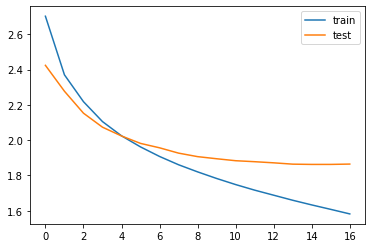

In [74]:
# 훈련 데이터의 손실과 검증 데이터의 손실이 줄어드는 과정 시각화
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## 7. 인퍼런스 모델 구현하기
테스트 단계에서는 정수 인덱스 행렬로 존재하던 텍스트 데이터를 실제 데이터로 복원해야 하므로, 필요한 3개의 사전을 아래와 같이 미리 준비해 둡니다.

In [75]:
# [테스트 단계] '정수 인덱스 행렬 -> 실제 데이터로 복원' 을 위한 사전 준비
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

print('=3')

=3


seq2seq는 훈련할 때와 실제 동작할 때(인퍼런스 단계)의 방식이 다르므로 그에 맞게 모델 설계를 별개로 진행해야 합니다.  
- 훈련 단계에서는 디코더의 입력부에 정답이 되는 문장 전체를 한꺼번에 넣고 디코더의 출력과 한 번에 비교할 수 있으므로,   
인코더와 디코더를 엮은 통짜 모델 하나만 준비했습니다.

- 그러나 정답 문장이 없는 인퍼런스 단계에서는 만들어야 할 문장의 길이만큼 디코더가 반복 구조로 동작해야 하기 때문에  
부득이하게 인퍼런스를 위한 모델 설계를 별도로 해주어야 합니다. 이때는 인코더 모델과 디코더 모델을 분리해서 설계합니다.

### 인퍼런스 단계의 인코더 모델 설계

In [76]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])
# 이 모델은 훈련된 인코더의 일부로, 디코더의 초개 상태를 얻기 위해 사용됩니다.

# 이전 시점의 상태들을 저장하는 텐서 - 디코더의 초기 상태를 받기 위한 입력 텐서를 생성 -> 추론 단계에서 디코더의 초기 상태 설정을 위해 사용됨.
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

# 디코더의 임베딩 적용 - 디코더의 입력 시퀀스에 대한 임베딩을 적용
dec_emb2 = dec_emb_layer(decoder_inputs)


# 디코더의 LSTM 실행
# 추론 단계에서 사용되어 디코더를 한 시점씩 진행하며 다음 단어를 예측
# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

print('=3')

=3


> 이렇게 구성된 모델은 훈련된 Seq2Seq 모델에서 인코더 부분과 일부 디코더 부분을 추출하여 훈련과정에서 사용한 모델과는 독립적으로 동작할 수 있습니다.

### 어텐션 메커니즘을 사용하는 출력층 설계

In [77]:
# 어텐션 메커니즘을 사용하는 출력층 설계

# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))    # 인코더의 출력과 어텐션을 계산하기 위한 입력
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat)    # 다음 단어의 확률 분포를 계산

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

print('=3')


# attn_out_inf : 어텐션의 결과로,
# 디코더의 출력 (decoder_outputs2)과 인코더의 출력 (decoder_hidden_state_input)을 입력으로 받아 어텐션을 계산

# decoder_model : 디코더의 동작을 정의하는 모델로, 
# 입력으로 디코더의 초기 상태와 어텐션을 계산한 결과를 받고, 출력으로 다음 단어의 확률 분포와 업데이트된 상태를 반환합니다.

=3


이렇게 구성된 디코더 모델은 훈련된 Seq2Seq 모델에서 디코더 부분을 추출하여, 새로운 입력에 대해 시퀀스를 생성하는 데 사용됩니다.  

### 인퍼런스 단계에서 단어 시퀀스를 완성하는 함수

In [78]:
# 인퍼런스 단계에서 단어 시퀀스를 완성하는 함수

def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    # input_seq에 대한 인코더의 출력 (e_out) 및 마지막 은닉 상태 (e_h) 및 마지막 셀 상태 (e_c)를 반환
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    # 디코더 입력 시퀀스를 초기화하고, <SOS> (시작 토큰)에 해당하는 인덱스로 설정
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    # stop_condition이 True가 될 때까지 루프 반복 : <EOS> (종료 토큰)에 도달하거나 최대 요약 길이에 도달할 때까지 계속 반복
    while not stop_condition: 

        # 디코더 모델에 대한 예측: decoder_model을 사용하여 디코더의 출력 토큰, 새로운 은닉 상태 (h), 새로운 셀 상태 (c)를 얻습니다.
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        # 샘플링된 토큰 확인 및 문장 구성: 디코더의 출력 중 가장 확률이 높은 토큰을 샘플링합니다.
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        # 디코딩 결과 및 중단 조건 확인: 디코딩된 토큰을 결과 문장에 추가하고, <EOS>에 도달하거나 최대 길이에 도달하면 디코딩을 중단합니다.
        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (summary_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence
print('=3')

=3


Q. 정답 문장이 없는 추론(inference) 단계에서는 왜 모델 설계를 별도로 해주어야 하나요?  
A. 생성해야 할 문장의 길이만큼 디코더가 반복 구조로 동작해야 하기 때문입니다.

## 8. 모델 테스트하기


테스트 단계에서는 정수 시퀀스를 텍스트 시퀀스로 변환하여 결과를 확인하는 것이 편합니다.
주어진 정수 시퀀스를 텍스트 시퀀스로 변환하는 함수를 만들어봅니다.   
함수를 만들 때,   
- Text의 정수 시퀀스에서는 패딩을 위해 사용되는 숫자 0을 제외하고 
- Summary의 정수 시퀀스에서는 숫자 0, 시작 토큰의 인덱스, 종료 토큰의 인덱스를 출력에서 제외하도록 만듭니다.

Q. seq2text 함수처럼 요약문의 정수 시퀀스를 텍스트로 변환하는 seq2summary 함수 코드를 작성하세요.
(힌트 : 요약문에는 sostoken과 eostoken을 고려해야 함)

In [79]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp = ''
    for i in input_seq:
        if i == tar_word_to_index['eostoken']:
            break
        if i != 0 and i != tar_word_to_index['sostoken']:
            temp = temp + tar_index_to_word[i] + ' '
    return temp

print('=3')


# temp : 문자열을 저장하는 변수

=3


In [80]:
# 테스트 데이터 약 50개의 샘플에 대해서 실제 요약과 예측된 요약을 비교하기

for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : want great granola look live none stores carry mail order granola get something good 
실제 요약 : yummy 
예측 요약 :  great


원문 : ordered product vacation delivered quickly exactly expected continue order item 
실제 요약 : good to the last drop 
예측 요약 :  great product


원문 : dogs chewed apart matter minutes eating small parts dogs powerful chewers 
실제 요약 : nylabone durable dental dinosaur 
예측 요약 :  not for me


원문 : bought hearing best reading good reviews previously tried wilton markers horrible excited try cake pops stopped working cleaned paper towel recommended packaging markers worked fine soon tried write candy nothing would happen understand work seem work great others 
실제 요약 : disappointed 
예측 요약 :  not for me


원문 : maxwell house coffee great aroma excellent taste less expensive local store delivered front door shipping cost 
실제 요약 : great coffee 
예측 요약 :  great coffee


원문 : purchased one one day really enjoyed found amazon ordered flavor favorite coconut bars taste great like prot

많은 결과가 출력이 되는데, 기존의 요약과는 다른 요약을 출력하면서도 원문의 내용을 담고 있는 의미 있는 요약들이 보입니다.  
심지어 일부 요약의 경우에는 원문에 없던 단어를 사용해서 요약을 하기도 하고 있어요. 워드 임베딩과 RNN의 콜라보로 이뤄낸 신기한 성과네요!

물론 슬프게도 그다지 좋지 않은 요약의 예도 꽤나 보이기도 합니다.  
성능을 개선하기 위해서는   
- seq2seq와 어텐션의 자체의 조합을 좀 더 좋게 수정하는 방법도 있고,   
- 빔 서치(beam search), 
- 사전 훈련된 워드 임베딩(pre-trained word embedding), 
- 인코더 - 디코더 자체의 구조를 새로이 변경한 하는 트랜스포머(Transformer)    

와 같은 여러 개선 방안들이 존재합니다. 이런 방안들에 대해서도 향후 살펴보게 될 것입니다.

## 9. 추출적 요약 해보기
앞서 seq2seq를 통해서 추상적 요약을 진행해봤습니다.  
그런데 텍스트 요약에는 추상적 요약 외에도 이미 본문에 존재하는 단어구, 문장을 뽑아서 요약으로 삼는 추출적 요약 방법도 있었습니다.  

Q. 앞에서 seq2seq 모델을 사용하여 추상적 요약을 했습니다. 그렇다면 추출적 요약은 무엇일까요?   
A. 추출적 요약은 원문에서 중요한 핵심 문장 또는 단어를 뽑아 구성된 요약문을 만드는 방식입니다.   
그래서 생성된 문장이나 단어는 원문에 포함되어 있기 때문에, 단점으로 언어 표현 능력이 제한되어 생성된 문장이 매끄럽지 않을 수 있습니다.   
대표적인 알고리즘으로는 TextRank가 있습니다.  

**패키지 Summa에서는 추출적 요약을 위한 모듈인 summarize를 제공**하고 있어 아주 간단하게 실습을 해볼 수 있습니다.  
영화 매트릭스 시놉시스를 요약해보면서 summarize 사용법을 익혀보겠습니다.

### 패키지 설치
클라우드의 경우 이미 summa 가 설치돼있습니다. 확인해보고 싶다면 아래 명령어를 Cloud Shell에서 실행해봅니다.  
$ pip list | grep summa

### 데이터 다운로드하기

In [81]:
# data download
import requests
from summa.summarizer import summarize

In [82]:
# 매트릭스 시놉시스를 다운로드
text = requests.get('http://rare-technologies.com/the_matrix_synopsis.txt').text

text에는 매트릭스 시놉시스가 문자열로 저장돼 있습니다. 출력 결과가 아주 길기 때문에 일부만 출력해보고, 잘 저장이 되었는지 확인해봅니다.

In [83]:
# 시놉시스 일부를 출력해보고, 잘 저장되었는지 확인하기
print(text[:1500])

The screen is filled with green, cascading code which gives way to the title, The Matrix.

A phone rings and text appears on the screen: "Call trans opt: received. 2-19-98 13:24:18 REC: Log>" As a conversation takes place between Trinity (Carrie-Anne Moss) and Cypher (Joe Pantoliano), two free humans, a table of random green numbers are being scanned and individual numbers selected, creating a series of digits not unlike an ordinary phone number, as if a code is being deciphered or a call is being traced.

Trinity discusses some unknown person. Cypher taunts Trinity, suggesting she enjoys watching him. Trinity counters that "Morpheus (Laurence Fishburne) says he may be 'the One'," just as the sound of a number being selected alerts Trinity that someone may be tracing their call. She ends the call.

Armed policemen move down a darkened, decrepit hallway in the Heart O' the City Hotel, their flashlight beam bouncing just ahead of them. They come to room 303, kick down the door and find a

### summarize 사용하기
**Summa의 summarize()의 인자로 사용되는 값들**에 대해서 알아봅니다.  

- text (str) : 요약할 테스트.  
- ratio (float, optional) – 요약문에서 원본에서 선택되는 문장 비율. 0~1 사이값  
- words (int or None, optional) – 출력에 포함할 단어 수.  
만약, ratio와 함께 두 파라미터가 모두 제공되는 경우 ratio는 무시한다.  
- split (bool, optional) – True면 문장 list / False는 조인(join)된 문자열을 반환  

Summa의 summarize는 문장 토큰화를 별도로 하지 않더라도 내부적으로 문장 토큰화를 수행합니다.   
그렇기 때문에 문장 구분이 되어있지 않은 원문을 바로 입력으로 넣을 수 있습니다.  
비율을 적게 주어서 요약문으로 선택되는 문장의 개수를 줄여봅니다. 원문의 0.005%만을 출력하도록 설정했습니다.

In [84]:
# Summary 출력하기
print('Summary:')
print(summarize(text, ratio=0.005))

Summary:
Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.
Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.


In [85]:
# 리스트로 출력 결과를 받기 - split 인자의 값을 True로 설정
print('Summary:')
print(summarize(text, ratio=0.005, split=True))

Summary:
['Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.', 'Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.']


In [86]:
# 단어의 수로 요약문의 크기를 조절하기 - 단어를 50개만 선택하도록 해보기
print('Summary:')
print(summarize(text, words=50))

Summary:
Trinity takes Neo to Morpheus.
Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.
Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.


---
## 회고
### KEEP
- 헷갈리는 개념을 중간 중간 정리하였다.
- model.summary() 결과를 해석하기 위해 자료를 찾아보며 이해하려고 노력했다.

### PROBLEM
- 모델 구현 부분부터는 흐름과 구조가 그려지지 않아 코드를 이해하기 어려웠다.

### TRY
- 기본 개념과 모델 구현을 이해하기 위한 자료 찾아보기
- 전체적인 흐름, 단계 위주로 여러 번 반복해서 보며 눈에 익히기

---
## Reference
- [판다스 열 삭제](https://docs.kanaries.net/ko/topics/Python/dataframe-drop-column)
- [apply, lambda 함수](https://zephyrus1111.tistory.com/90)
- [LSTM 아마존 리뷰 감성 분석 - torch](https://blog.naver.com/songblue61/221853600720)
- [seq2seq와 어텐션 메커니즘의 작동방식](https://glee1228.tistory.com/3)